In [1]:
import pandas as pd
import geopandas as gpd
import mapclassify
import pysal
import matplotlib.pyplot as plt
from geosnap import DataStore
from geosnap.io import get_lodes

/opt/tljh/user/lib/python3.10/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
/opt/tljh/user/lib/python3.10/site-packages/quantecon/lss.py:20: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def simulate_linear_model(A, x0, v, ts_length):


In [24]:
datasets = DataStore("/srv/data/geosnap")
#Accessing data with GeoSNAP

In [25]:
lodes = get_lodes(datasets, county_fips='06073', years=[2021])
#Getting LODES data for San Diego County for 2021

In [4]:
lodes.columns

Index(['geoid', 'year', 'CFA01', 'CFA02', 'CFA03', 'CFA04', 'CFA05', 'CFS01',
       'CFS02', 'CFS03', 'CFS04', 'CFS05', 'aland20', 'awater20',
       'create_date', 'earnings_1251_3333', 'earnings_over_3333',
       'earnings_under_1250', 'education_bachelors', 'education_hs',
       'education_lths', 'education_some_college', 'employees_30_54',
       'employees_55plus', 'employees_asian', 'employees_black',
       'employees_female', 'employees_hawaiian_pi', 'employees_hispanic',
       'employees_male', 'employees_native_american', 'employees_not_hispanic',
       'employees_twoplus_races', 'employees_under_30', 'employees_white',
       'geometry', 'housing_units', 'naics_11', 'naics_21', 'naics_22',
       'naics_23', 'naics_31_33', 'naics_42', 'naics_44_45', 'naics_48_49',
       'naics_51', 'naics_52', 'naics_53', 'naics_54', 'naics_55', 'naics_56',
       'naics_61', 'naics_62', 'naics_71', 'naics_72', 'naics_81', 'naics_92',
       'population', 'total_employees'],
      dtyp

<Axes: >

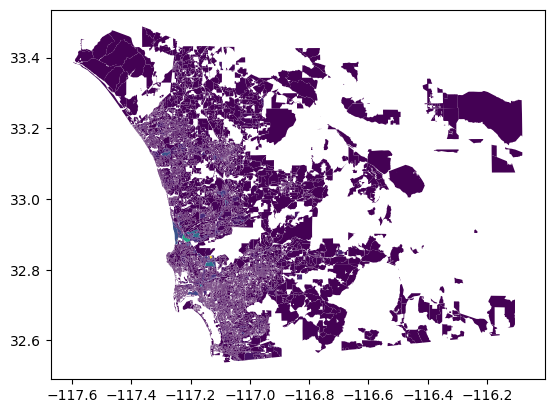

In [26]:
lodes.plot(column='total_employees')
#visualizing areas with data recorded

In [6]:
lodes.shape

(28633, 59)

In [27]:
lodes['total_employees'].isna().sum()
#getting an understanding of the database, its size and how many areas have null values

12657

array([[<Axes: title={'center': 'total_employees'}>]], dtype=object)

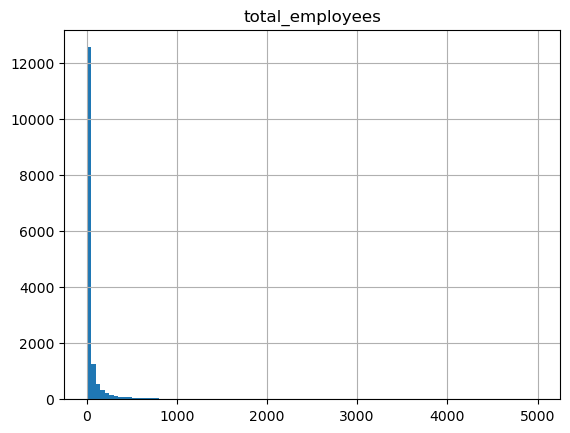

In [28]:
lodes.hist(column='total_employees', bins=100, range=(1, 5000))
#visualizing how most areas have no employees recorded

<Axes: >

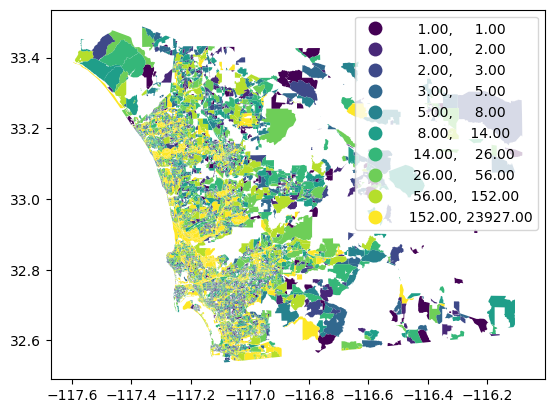

In [29]:
lodes.plot(column='total_employees', scheme='Quantiles', k=10, legend=True)
#visualizing areas with higher concentrations of total employees

In [30]:
centers = lodes[lodes['total_employees']>4000]
#Identifying Employment Centers as places with over 4,000 total employees
#Identification based on an adaptation of the paper cited below, adjusted for San Diego's Population.
#Li, T., & Dodson, J. (2020).
#"Job growth, accessibility, and changing commuting burden of employment centres in Melbourne."
#Journal of Transport Geography, 88, 102867.

In [31]:
centers.to_parquet(path="lodes.parquet")
#Creating lodes.parquet which saves the employment centers to be used in further analysis